In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Testing the difference between a Binomial/Poisson distribution and a 
# Gaussian distribution as you change the parameters of the Binomial/Poisson using:
# 1) KS 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest
# 2) AD
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson
# 3) KL
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html#scipy.stats.entropy
# 4) Pearson's chisq (not done in skeleton NB)

# use the scipy.stats package for this. 
# For KS (Kolmogorov-Smirnoff), AD (Anderson Darling) generate the distribution 
# against which you can test a normal (Gaussian) distribution: the KS and AD functions in 
# scipy have functionality to test against standard distributions (normal, chisq etc) without 
# you having to code up anything about the distribution itself. KL divergence test and chi square test do not. 

In [2]:
alpha = 0.05
np.random.seed(999)

# Normal Distribution
norm = np.random.randn(1000) 

# Normalized Poisson Distribution
lam = 20
pois = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))

# Normalized Binomial Distribution
n = 10 
p = 0.5
binom = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))

# Array of means for looping
mean_array = np.arange(10, 2000, 10)

In [4]:
# test poisson dist Ho: sample dist from gauss dist

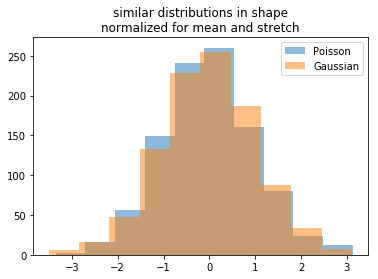

Poisson on Normal

KS Test: KstestResult(statistic=0.052468363120939276, pvalue=0.0078294399170928397)

AD Test: AndersonResult(statistic=2.3670726571554042, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00491776967451

Pearson's Chi-Squared:


(None, Power_divergenceResult(statistic=-1861.7836790667943, pvalue=1.0))

In [6]:
# plot the Poisson & Normal distributions

pl.hist(pois, alpha=0.5, label="Poisson")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nnormalized for mean and stretch")
pl.show()

# run the KS test for Poisson
print ("Poisson on Normal\n")
print ("KS Test:", scipy.stats.kstest(pois,'norm'))

#Run the AD test for Poisson
print ("\nAD Test:", scipy.stats.anderson(pois, dist='norm'))

# prep and run the KL test for Poisson
pdfPois, poisBins, = np.histogram(pois, density=True)
poisBinCent = poisBins[:-1] + 0.5*(poisBins[1] - poisBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfPois, scipy.stats.norm.pdf(poisBinCent)))

# the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared:"), scipy.stats.chisquare(pois, norm)

In [7]:
# KS Test - Because the p-value (0.007) is below our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian
# AD Test - Because out AD statistic (2.36) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian
# KL Test - Because out KL statistic (0.0049) is WHAT?
# reject $H_0$ and assert that our sample distribution is not Gaussian
# Chi-Square Test - Because of HOW DO WE INTERPRET CHI-SQUARE RESULTS

In [8]:
# Testing the Binomial Distribution
# $H_0$: The sample distribution comes from a Gaussian distribution
# alpha = 0.05

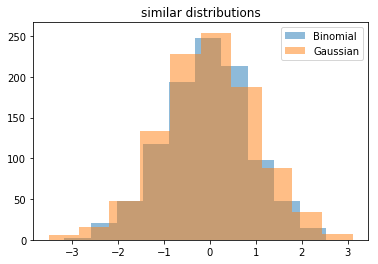

Binomial on Normal

KS Test: KstestResult(statistic=0.127, pvalue=1.6209256159527285e-14)

AD Test: AndersonResult(statistic=15.204460551392458, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00641114132785

Pearson's Chi-Squared - 


(None,
 Power_divergenceResult(statistic=3416.8197399489045, pvalue=4.0325568531430412e-261))

In [9]:
# plot the Binomial & Normal distributions

pl.figure()
pl.hist(binom, alpha=0.5, label="Binomial")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

# KS test for Binomial
print ("Binomial on Normal\n")
print ("KS Test:", scipy.stats.kstest(binom,'norm'))

# AD test for Binomial
print ("\nAD Test:", scipy.stats.anderson(binom,'norm'))

# prep run the KL test for Binomial
pdfBinom, binomBins, = np.histogram(binom, density=True)
binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent)))

# Chi-Square test for Poisson
print ("\nPearson's Chi-Squared - "), scipy.stats.chisquare(binom, norm)

In [10]:
# KS Test - Because the p-value is extremely smaller than our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian
# AD Test - Because out AD statistic (15.2) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian
# KL Test - Because out KL statistic (0.0064) is WHAT?
# we can reject $H_0$ and assert that our sample distribution is not Gaussian
# Chi-Square Test - Because of HOW DO WE INTERPRET CHI-SQUARE RESULTS

In [11]:
np.random.seed(999) # binomial

binom_KS_p_values = []
binom_AD_p_values = []

for n in mean_array:
    p = 0.5
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    KS_p_value = scipy.stats.kstest(dist,'norm')[1]
    binom_KS_p_values.append(KS_p_value)
    AD_p_value = scipy.stats.anderson(dist,'norm')[1]
    binom_AD_p_values.append(AD_p_value)

NameError: name 'narray' is not defined

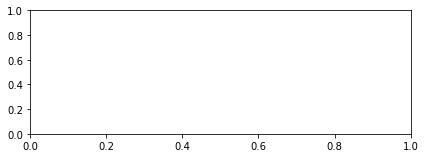

In [12]:
#KS Test
fig = pl.figure(figsize = (15,5))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

#AD Test
fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')

#Chi-Square Test
fig.add_subplot(224)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

In [13]:
np.random.seed(999) # poisson
narray = []
for i,n in enumerate(narray):
    lam = i 
    dist = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))
    ks_stat_pois[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_pval_pois[i] = scipy.stats.kstest(dist,'norm')[1]

NameError: name 'ks_s_b' is not defined

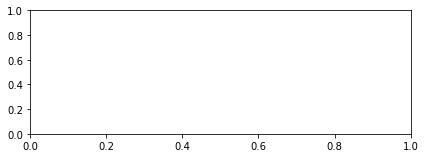

In [14]:
# KS Test
fig = pl.figure(figsize = (15,5))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

# AD Test
fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

# KL Test
fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')

# Chi-Square Test
fig.add_subplot(224)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

In [4]:
#generate the distribution
alpha = 0.05
np.random.seed(999)
dist_n = np.random.randn(1000) 

#test AD and KS. easy to run
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



In [7]:
#pl.figure()
#pl.hist(dist_p, alpha=0.5, label="Poisson")
#pl.hist(dist_n, alpha=0.5, label="Gaussian")
#pl.legend()
#pl.title("similar distributions in shape\nbut different mean and stretch")
#pl.show()
#print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
#print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
#print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian" + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 

IndentationError: unexpected indent (<ipython-input-7-96404167da73>, line 10)

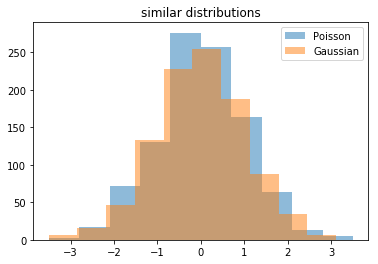

poisson vs normal KstestResult(statistic=0.047740290560897014, pvalue=0.02027702397150466)
poisson vs normal AndersonResult(statistic=0.72428815547573322, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value but still rejecting the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


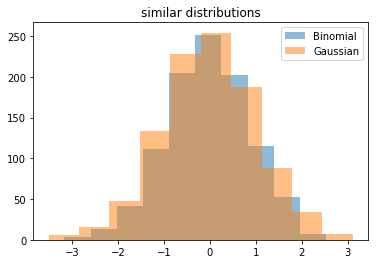

binomial vs normal KstestResult(statistic=0.127, pvalue=1.6209256159527285e-14)
binomial vs normal AndersonResult(statistic=15.89083442237586, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
 what does the result of each test say??


In [8]:
# poisson with 1000 elements, lambda=100 (high)

dist_p = np.random.poisson(100, 1000)


np.random.seed(999)

dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev, exponent
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: lower p-value but still rejecting the H0 at alpha=0.05") 
print ("AD: statistics AD=0.92 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))
n, p = 10, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))
print (" what does the result of each test say??")

In [9]:
# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

In [10]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00527211066212
poisson on normal 0.00698654857671
binomial on normal 0.078200757041


In [11]:
np.random.seed(999)

#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)

NameError: name 'narray' is not defined

NameError: name 'narray' is not defined

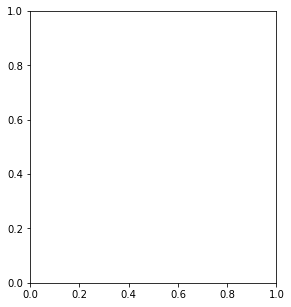

In [12]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

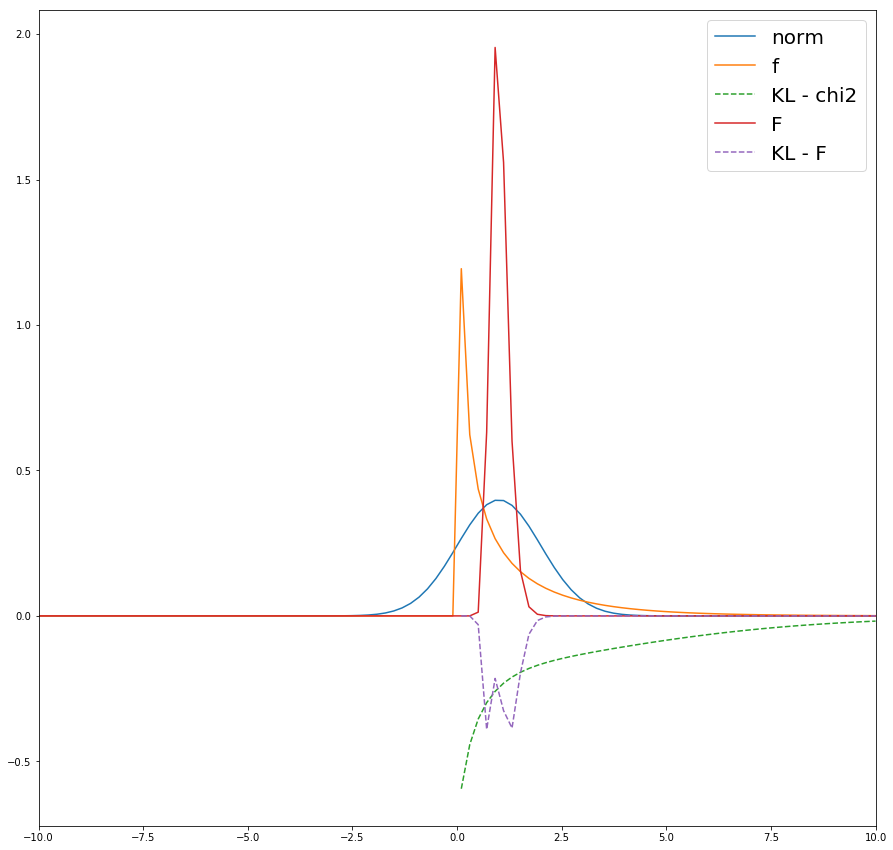

In [16]:
pl.figure(figsize=(15,15))

q = lambda x, mu : scipy.stats.distributions.norm.pdf(x - mu)
c = lambda x, mu : scipy.stats.distributions.chi2.pdf(x, df=mu)
f = lambda x, mu : scipy.stats.distributions.f.pdf(x,100,100)

Dkl = lambda x ,mu, p :  p(x, mu) * np.log10(q(x, mu)) + p(x, mu) * np.log10(p(x, mu))

def model(x) : 
    #gaussian model from scratch
    return 1. / (s * np.sqrt(2 * np.pi)) * np.exp(- ((x - m)**2 / 2. / s**2))

x = np.linspace(-10,10,100)
pl.plot(x, q(x, 1), label='norm')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, p))

pl.plot(x, c(x,1), label='f')
pl.plot(x,Dkl(x, 1, c), '--', label = 'KL - chi2')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, c))

pl.plot(x, f(x,1), label='F')
pl.plot(x, Dkl(x, 1, f), '--', label = 'KL - F')

#print np.nansum(Dkl(np.linspace(0,30,1000), 1, f))
bins = np.arange(0, 99, 10)

pl.xlim(-10, 10)
pl.legend(fontsize = 20);